In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('Vino_normalizado.csv')

In [3]:
df.columns

Index(['Beneficio', 'Compra', 'Acidez', 'AcidoCitrico', 'pH', 'CloruroSodico',
       'Densidad', 'Azucar', 'Sulfatos', 'Alcohol', 'Etiqueta',
       'CalifProductor', 'Clasificacion', 'Region', 'PrecioBotella'],
      dtype='object')

#### Preparación de los Datos para Machine Learning

In [4]:
X = df.drop(['PrecioBotella'], axis=1)
y = df['PrecioBotella']

#### Separación de Datos en Entrenamiento y Prueba

In [5]:
from sklearn.model_selection import train_test_split

# Separar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Entrenamiento del Modelo para Predecir el Precio de la Botella de Vino
Utilizaremos un modelo de regresión lineal como punto de partida para predecir el precio.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modelo para predecir el precio
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 2.1764792983862575
R2: -0.00727530241542973


Dado que los resultados iniciales muestran un MSE relativamente alto y un R² negativo, esto indica que el modelo de regresión lineal no está capturando bien la variabilidad de los datos 

#### Revisar la Correlación entre las Características y el Objetivo

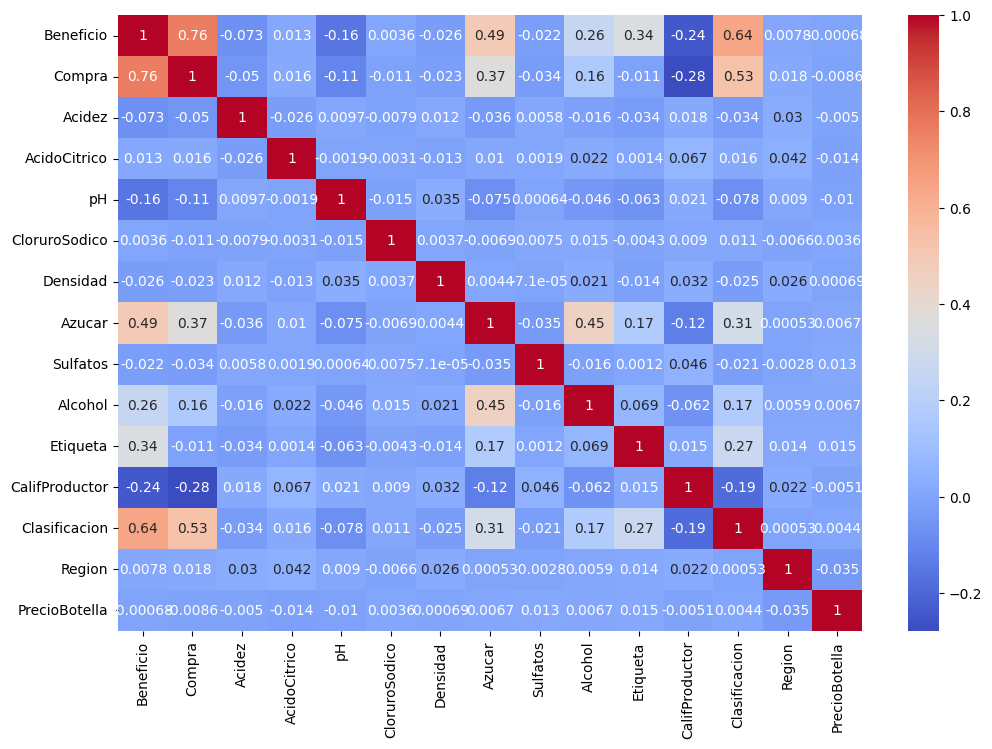

PrecioBotella     1.000000
Etiqueta          0.015249
Sulfatos          0.012525
Azucar            0.006744
Alcohol           0.006704
Clasificacion     0.004351
CloruroSodico     0.003564
Densidad          0.000690
Beneficio        -0.000684
Acidez           -0.004987
CalifProductor   -0.005086
Compra           -0.008579
pH               -0.010473
AcidoCitrico     -0.014480
Region           -0.035017
Name: PrecioBotella, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación entre características
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Correlación con 'preciobotella'
print(correlation_matrix['PrecioBotella'].sort_values(ascending=False))


La matriz de correlación muestra que ninguna de las características tiene una correlación fuerte con el precio de la botella de vino.

#### Probar Diferentes Modelos de Machine Learning

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Definir modelos
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'Ridge': Ridge()
}

# Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f'{name} - MSE: {mse}, R2: {r2}')


RandomForest - MSE: 2.2666252648466982, R2: -0.04899488398705154
GradientBoosting - MSE: 2.1985629603390793, R2: -0.01749562809850036
Ridge - MSE: 2.17640457576472, R2: -0.0072407207627294135


Ninguno de los modelos iniciales ha mejorado significativamente el rendimiento en comparación con la regresión lineal.



##### Conclusion:

Con los resultados obtenidos hasta ahora, parece que predecir el precio de la botella de vino con los datos disponibles no va a ser muy preciso.

Baja correlación entre las características y el objetivo: Ninguna de las características tiene una correlación fuerte con el precio de la botella de vino.

Desempeño de los modelos: Todos los modelos probados (Random Forest, Gradient Boosting, Ridge Regression) tienen un rendimiento pobre, con MSE altos y R² negativos o cercanos a cero.